In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:95% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color="red" size="5">ch.10 N차원 배열 다루기</font></b>
- N차원 배열: 하나 이상의 축(axis)을 가지는 동일한 자료형의 값들로 구성된 다차원 배열
- [numpy](https://numpy.org/doc/stable/)
- [numpy_API](https://numpy.org/doc/stable/reference/index.html)
- ↑ N차원 배열 객체 생성에 필요한 라이브러리
- 2차원 배열을 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지
# 1절 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [4]:
# np.arange(from, stop, step) : from 부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [9]:
#arange(15): 0~14의 연속 정수 배열 (1차원)
#reshape(3, 5): 3행 5열로 재구성 → 2차원 배열
/ 
from numpy import arange #1차원 함수를 2차원 함수로 변경
a = arange(15).reshape(3,5)  #3행 5열짜리 2차원 배열로 변환 reshpae(행,열) 함수사용
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [10]:
type(a) #a변수의 타입

numpy.ndarray

In [11]:
a.dtype #a배열 요소의 type

dtype('int32')

In [12]:
a.dtype.name #자료형 이름을 문자열로 반환

'int32'

In [13]:
a.itemsize #한 요소의 bytesize

4

In [14]:
a.ndim #차원수(축수)

2

In [15]:
a.size #배열요소의 갯수

15

In [16]:
a.shape #배열의 구조(반드시 튜플로 들어가야함.)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [18]:
print('구조변경 전', a, sep='\n')
a.shape = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [19]:
# 타입변경(이런식으로 데이터를 변경하면 안된다. 다른 함수를 써서 데이터를 변경해야 한다.)
a=arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
a.dtype

dtype('int32')

In [22]:
a.itemsize

4

In [27]:
a.size, a.shape #12개 요소가 3행 4열짜리로 되어있음.

(6, (3, 2))

In [24]:
a.dtype = np.int64 # a배열을 읽을 때 64bit씩 읽는다.
a.dtype

dtype('int64')

In [28]:
a.itemsize

8

In [30]:
a.size, a.shape #a사이즈가 바뀌어있다.

(6, (3, 2))

In [31]:
a #데이터가 변조되었다.

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [42]:
# 타입변경(이런식으로 바꾸어야 한다.)
a=arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [50]:
a = a.astype(np.int64) #= a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [45]:
a.dtype

dtype('int64')

In [46]:
a.itemsize

8

In [ ]:
a.size, 

In [47]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [48]:
#1차원으로 변경(플랫한다고 표현함)
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [49]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열저장

In [52]:
a #를 저장하고 싶다면

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [53]:
#피클파일 저장하는것처럼 하기(머신러닝이라 num파일 저장시)(모든 파이썬 객체 저장 가능	파이썬 외부에서 읽기 어려움)
import pickle #파이썬 내장 모듈인 피클을 불러옵니다.
with open('data/ch10_a.pkl', 'wb') as f: #파일을 안전하게 열고 자동으로 닫아주는 구문입니다.
    pickle.dump(a, f) #	변수 a의 내용을 파일에 저장합니다.

In [54]:
# 저장된 배열 불러오기 (역직렬화)
with open('data/ch10_a.pkl', 'rb') as f:
    load_a=pickle.load(f)

In [55]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [56]:
np.all(a == load_a) #a넘파이배열과 load_a 넘파이 배열이 같은지

True

In [57]:
#NumPy 전용 방식 (.npy), 저장 (빠르고, 넘파이 최적화	넘파이 외 객체는 저장 불가)
np.save('data/ch10_a.npy', a)

In [58]:
#불러오기
load_a2 = np.load('data/ch10_a.npy')
#비교
np.all(load_a2==a)

True

# 2절. 넘파이 배열
- array()함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들...
## 2.1 array()함수로 넘파이 배열 만들기
- array(리스트나 튜플, dtype=np.xxx, copy=T/F)

In [63]:
a= np.array([2., 4, 6], dtype=np.int8) # 정수의 기본 타입은 int 32 #리스트, 튜플 등을 넘파이 배열로 변환
                                    #요소들의 데이터 타입을 int8로 지정 (1바이트 정수)
#정수만 있을 경우 → int32 (기본값)
#실수가 하나라도 있다면 → float64로 전체 변환
#문자가 하나라도 있다면 → 전체가 str로 변환

a

array([2, 4, 6], dtype=int8)

In [65]:
#리스트처럼 순서대로 값 추출 가능
#인덱스는 0부터 시작
a[0], a[1], a[2]

(2, 4, 6)

In [66]:
a.dtype

dtype('int8')

In [67]:
#2차원으로 만들기
b = np.array([1.3,2.4],[4,5], dtpe=np.float32).reshape(1,4)
b

TypeError: array() got an unexpected keyword argument 'dtpe'

In [68]:
b.itemsize

NameError: name 'b' is not defined

In [69]:
b.astype(np.float64)

NameError: name 'b' is not defined

In [76]:
l = [[1, 2], [3.4, 4.5]]  # 2차원 리스트 정의

for row in l:  # 각 행(row)을 반복
    for data in row:  # 행 내의 각 데이터를 반복
        print(data, end='\t')  # 데이터를 탭 간격으로 출력 (가로 정렬)
    print()  # 각 행 출력 후 줄바꿈


1	2	
3.4	4.5	


In [77]:
c = np.array([[1, 2], [3.4, 4.5]], dtype=np.float16)  # float16 형식의 2차원 넘파이 배열 생성

for i, row in enumerate(c):  # 행의 인덱스(i)와 행 데이터(row)를 함께 반복
    for j, item in enumerate(row):  # 열의 인덱스(j)와 각 요소(item)를 함께 반복
        print("{}행{}열:{}".format(i, j, item), end='\t')  # 위치와 값을 출력 (탭 간격)
    print()  # 각 행 출력 후 줄바꿈

0행0열:1.0	0행1열:2.0	
1행0열:3.400390625	1행1열:4.5	


In [75]:
#인덱싱 슬라이싱한거처럼 이것도 똑같은짓을 할수있다.
c

array([[1. , 2. ],
       [3.4, 4.5]], dtype=float16)

In [80]:
c = np.array([[1,2,3,4,5], [6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [81]:
c[0,3]

4

In [82]:
c[:, 1:3] # 모든행, 1열부터 3열앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [85]:
# 0행 2열~4열까지
c[0, 2:5]

array([3, 4, 5], dtype=int16)

In [87]:
# 모든행의 맨 마지막 열만 추출
c[:, -1]

array([ 5, 10], dtype=int16)

In [88]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [92]:
c = np.array([[1,2], [3,4]])
d = np.array(c, copy=False) #d=c 얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소= {}, d주소:{}'.format(id(c), id(d)))
#c값이 변경되었음

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소= 1273770712144, d주소:1273770712144


In [93]:
c = np.array([[1,2], [3,4]])
d = np.array(c, copy=True) #d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소= {}, d주소:{}'.format(id(c), id(d)))
#c값이 그대로임.

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소= 1273770711664, d주소:1273770712528


## 2.2 기본값이 있는 배열만들기
- np.zeros( (tup) ) : 요소들이 다 0으로 채워짐.
- np.ones( (tupe) ) : 요소들이 다 1로 채워짐. 기본값이 float타입이 됨.
- np.full( tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값(메모리상태에 따라 달라짐)
※ 위의 함수를 이용해서 생성된 배열을 기본 dtype이 float64. dtype속성 따라 지정 가능

In [96]:
np.zeros( (3, 5) )

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [98]:
x = np.ones((3,5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [99]:
np.full( (2, 5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [100]:
np.empty((2,5)) #뭐가 나올지 나도 모름.

array([[0.00e+000, 4.94e-324, 9.88e-324, 1.48e-323, 1.98e-323],
       [7.16e-322, 7.21e-322, 7.26e-322, 7.31e-322, 7.36e-322]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균loc과 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1인 정규분포)의 1차원 난수배열 발생(난수 n개)
cf. np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

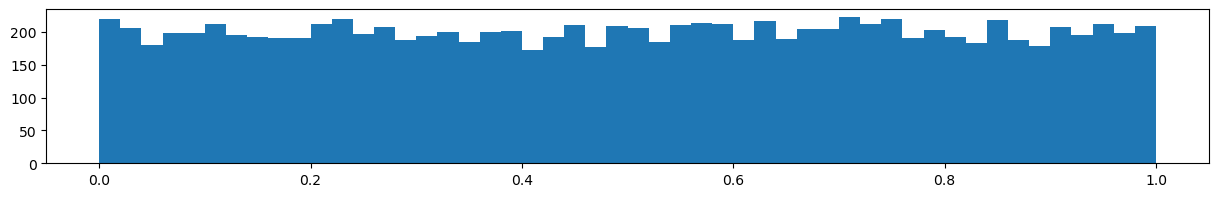

In [106]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

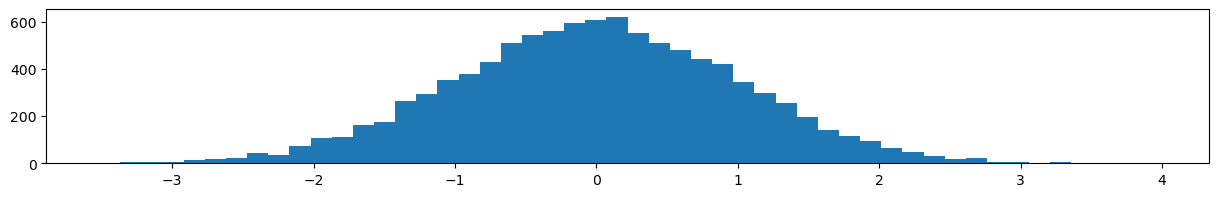

In [107]:
x = np.random.randn(10000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

In [112]:
#2차원 난수 배열
np.random.seed(7) # seed값을 맞추면 발생되는 난수 순서가 동일해짐
np.random.random( (2, 5) ) #0부터 1미만 균등분포 난수 배열

array([[0.07630829, 0.77991879, 0.43840923, 0.72346518, 0.97798951],
       [0.53849587, 0.50112046, 0.07205113, 0.26843898, 0.4998825 ]])

In [113]:
np.random.uniform(-1, 10, (2,5)) #-1~10미만의 균등분포 난수 배열

array([[ 6.47152996,  7.8411294 ,  3.19035246, -0.27470018,  2.16960159],
       [ 9.0055288 ,  1.34723889,  3.97336358,  9.24326622, -0.7261085 ]])

In [114]:
np.random.normal(10, 2, (2, 5)) #평균 10, 표준편차 2인 정규분포 난수 배열

array([[11.10916062, 10.24776181, 10.54891985,  6.94695094, 13.30139938],
       [10.30867107,  9.22572011, 14.05814444,  9.90922794,  7.0986426 ]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from부터 stop앞까지 by씩 증감하는 정수배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열로 생성

In [115]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [117]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

<function matplotlib.pyplot.show(close=None, block=None)>

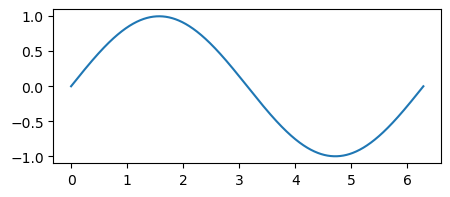

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 2))
plt.plot(x, y)
plt.show

In [121]:
np.linspace(0,2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [122]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수,] 행수, 열수) : -1이 올 수도
- resize([면수,] 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 업스면 배열 수정됨.

In [123]:
a = np.random.random( (2,3) )
a

array([[0.37238469, 0.47740115, 0.36589039],
       [0.83791799, 0.76864751, 0.31399468]])

In [126]:
a = np.round(a * 10) #round : 반올림 / floor : 내림 / ceil : 올림
a

array([[4., 5., 4.],
       [8., 8., 3.]])

In [129]:
a=a.reshape(3,2)
a

array([[4., 5.],
       [4., 8.],
       [8., 3.]])

In [130]:
a.reshape(2, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[4., 5., 4.],
       [8., 8., 3.]])

In [133]:
a = a.reshape(-1, 1)
a

array([[4.],
       [5.],
       [4.],
       [8.],
       [8.],
       [3.]])

In [136]:
a.resize( (2,3) ) # 결과를 출력하지 않는 함수는 배열을 바꿈 -1불가

In [137]:
a

array([[4., 5., 4.],
       [8., 8., 3.]])